## FAKE NEWS DETECTOR - FEATURE ENGINEER (TFIDF AND COUNT)

TF-IDF and CountVectorizer are techniques used for feature engineering in Natural Language Processing (NLP) tasks, which include Machine Learning tasks. In the context of fake news detection, both TF-IDF and CountVectorizer are employed to convert textual data into numerical representations that machine learning models can work with. These techniques are not directly related to deep learning tasks; instead, they are more commonly used in traditional machine learning algorithms.

CountVectorizer converts a collection of text documents to a matrix of word counts, where each row corresponds to a document and each column corresponds to a unique word in the dataset. This matrix represents the frequency of each word's occurrence in each document. Multinomial Naive Bayes (MultinomialNB) is a machine learning algorithm that's often used in combination with CountVectorizer for classification tasks like fake news detection. It's particularly suitable for text classification problems.

TF-IDF (Term Frequency-Inverse Document Frequency) is another method that converts text data into numerical features. It considers not only the frequency of words in a document but also their importance relative to the entire dataset. Words that appear frequently in a specific document but rarely in others are considered more important. Like CountVectorizer, TF-IDF is used in conjunction with classifiers like MultinomialNB for classification tasks.

F-IDF and CountVectorizer, when used in combination with classifiers like MultinomialNB, are essential tools for feature engineering and machine learning in the realm of fake news detection and text classification tasks. They help in transforming raw text data into structured numerical data that machine learning algorithms can analyze and make predictions on.

### Imports

In [26]:
! pip install nltk
! pip install scikit-learn

#### Others
import pandas as pd
import numpy as np
import re
import warnings
import pickle
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

#### Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### NLTK
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



### Constants

In [2]:
DATA_BASE_PATH = "./data/feature_engineering/"
TRAIN_RATIO = 0.70
TEST_RATIO = 0.30
MAX_FEATURES_VECTORIZER= 500

### Load data

In [3]:
# Load Dataset
train_data = pd.read_csv(DATA_BASE_PATH + 'train.csv')
test_data = pd.read_csv(DATA_BASE_PATH + 'test.csv')

### Preprocessing

The provided code snippet involves data preprocessing steps.

First of all, we must remove the rows with missing values (NaN) from the train_data dataset. 

After dropping rows, the indices of the remaining rows may become non-contiguous by resetting the index of the DataFrame to ensure continuous and sequential indexing. This results in an updated DataFrame with a reset index, where the previous index values are moved to a new column, and a new sequential index is assigned to each row.

In [4]:
# Remove NaN
train_data = train_data.dropna()
train_data.reset_index(inplace = True)

First step to continue preprocessing is to prepare input features and targe labels by creating two dataframes, one of them leaving only the input features for model training, and the other with the 'label' column is assigned to the variable y_train, representing the target labels corresponding to the input features in x_train.

In [5]:
# Get target column (Y) and input features (X)
x_train = train_data.drop('label',axis =1)
y_train = train_data['label']

The provided code snippet initializes a PorterStemmer (from the Natural Language Toolkit (NLTK) library is initialized. The stemmer will be used to reduce words to their root form.) for text stemming and creates empty lists corpus and words. It iterates through each title in the DataFrame, removing non-alphanumeric characters, converting to lowercase, and splitting into words. The words are then stemmed and stopwords are removed, resulting in preprocessed sentences added to the corpus list and individual stemmed words to the words list. This process prepares the text data for analysis or model training.

In [6]:
# Stemming and preprocessing
def preprocessing(data):
    ps = PorterStemmer()
    words = []
    corpus = []
    for i in range(0,len(data)):
        review = re.sub('[^a-zA-Z0-9]',' ',train_data['title'][i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        statements = ' '.join(review)
        corpus.append(statements)
        words.append(review)

    return corpus
    

In [7]:
corpus = preprocessing(train_data)

The provided code segment involves the creation of two text vectorizers, CountVectorizer and TfidfVectorizer. The CountVectorizer is configured to consider up to 5000 features (unique words) and include n-grams of size 1 to 3. It then transforms the preprocessed text data stored in the corpus list into a numeric matrix X_count using the .fit_transform() method. 

Similarly, the TfidfVectorizer is set with the same parameters, and the transformed matrix is stored in X_tfidf. These matrices represent the tokenized and vectorized versions of the text data for further analysis or machine learning modeling.

In [8]:
# Prepare vectorizers (CountVectorizer)
count_vectorizer_handler = CountVectorizer(max_features=MAX_FEATURES_VECTORIZER,ngram_range=(1,3))
X_count = count_vectorizer_handler.fit_transform(corpus).toarray()

# Prepare vectorizers (TFIDFVectorizer)
tfidf_handler = TfidfVectorizer(max_features=MAX_FEATURES_VECTORIZER,ngram_range=(1,3))
X_tfidf = tfidf_handler.fit_transform(corpus).toarray()

In the provided context, both CountVectorizer and TfidfVectorizer are used for text vectorization, but they differ in how they assign weights to words in the text data.

- CountVectorizer: This vectorizer counts the frequency of each word in the corpus and represents the text data as a matrix where each row corresponds to a document and each column corresponds to a unique word in the entire corpus. The values in the matrix are the raw word counts. This approach is useful for capturing the importance of words based on their frequency, but it may not handle the varying importance of words across different documents.

- TfidfVectorizer (Term Frequency-Inverse Document Frequency): This vectorizer also counts the frequency of words, but it also takes into account the rarity of words in the entire corpus. It assigns higher weights to words that are frequent in a document but rare in other documents, as these words are assumed to carry more informative content. This helps mitigate the issue of common words dominating the analysis. The resulting matrix contains normalized values representing the TF-IDF scores for each word in each document.

In summary, while both vectorizers transform text data into numerical representations, TfidfVectorizer additionally considers the significance of words within a specific document and across the entire corpus, making it often more suitable for tasks like document classification or information retrieval where term importance matters.

In [9]:
# Split for CountVectorizer
X_train_count,X_test_count,Y_train_count,Y_test_count = train_test_split(X_count,y_train,test_size=TEST_RATIO,random_state = 27)

# Split for TFIDFVectorizer
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf = train_test_split(X_tfidf,y_train,test_size=TEST_RATIO,random_state = 27)

The provided code snippet uses the get_params() method on a CountVectorizer object named count to retrieve its current configuration settings. The output shows a dictionary containing various parameters and their current values that define how the CountVectorizer is functioning. Some of the notable parameters and their explanations are as follows:

- analyzer: Specifies whether words should be treated as "word" units.
- binary: Whether the word counts should be binary (True if the word is present, False if not). In this cse, it is not binary.
- max_features: The maximum number of features (words) to include in the vocabulary. In this case, 5000
- ngram_range: The range of n-grams to consider (in this case, unigrams, bigrams, and trigrams). In this case, 1 to 3.
- lowercase: Whether to convert all words to lowercase before counting.
- max_df: The threshold for ignoring words that appear in a high proportion of documents.
- min_df: The threshold for ignoring words that appear in a low proportion of documents.
- stop_words: A list of words to be ignored (common words like "and", "the", etc.). No stopwords ignored here, it was made before on the stemming.
- strip_accents: How to handle accents (if any) in words. No accents striped here.
- token_pattern: The regular expression pattern for identifying tokens (words).
- vocabulary: A mapping of words to feature indices.

These parameters control how the CountVectorizer preprocesses and constructs the feature vectors from the text data. By inspecting these parameters, you can understand how the vectorization is being performed and potentially fine-tune the settings to better suit your specific use case.

In [10]:
count_vectorizer_handler.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 500,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

The code snippet creates a DataFrame named df_count from the feature matrix X_train_count generated by the CountVectorizer. Each row of the DataFrame corresponds to a document (text sample), and each column corresponds to a unique word (feature) present in the vocabulary created by the CountVectorizer. The columns are labeled with the words themselves using the tfidf.get_feature_names() method. 

This DataFrame allows us to see the frequency counts of each word (feature) in the documents. The .head() method is used to display the first few rows of the DataFrame, providing an initial glimpse of the word frequency distribution across the documents.

In [11]:
df_count = pd.DataFrame(X_train_count,columns = tfidf_handler.get_feature_names_out())
df_count.head()

,000,10,100,11,20,2016,access,accus,act,ad,...,worker,world,world war,would,year,year old,york,york time,young,zika
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


### Tranining

Now, we will use  two instances of the MultinomialNB classifier to create the predictors. 

This classifier is used for text classification tasks, particularly suited for multinomially distributed data, such as word counts in text data. The parameter alpha is set to 0.1, which is a smoothing parameter that helps handle cases where some words may not appear in the training data. 

One instance is named classifier_count, which suggests it will be used with the word count data obtained from the CountVectorizer representation. The other instance is named classifier_tfidf, indicating its use with the TF-IDF vectorized data obtained from the TfidfVectorizer. These classifiers are prepared to be trained and used for text classification purposes.


In [12]:
classfier_count = MultinomialNB(alpha=0.1)
classfier_tfidf = MultinomialNB(alpha=0.1)

Now, we will proceed to train the classifiers with the given inputs

In [13]:
# CountVectorizer Classifier
classfier_count.fit(X_train_count,Y_train_count)
Y_pred_count = classfier_count.predict(X_test_count)

# TFIDF Classifier
classfier_tfidf.fit(X_train_tfidf,Y_train_tfidf)
Y_pred_tfidf = classfier_tfidf.predict(X_test_tfidf)

Now, we will use the Passive Aggresive algorithm with TF-IDF or CountVectorizer to allow the model to adapt to new patterns and features that might emerge in the evolving landscape of fake news. This adaptability, coupled with the efficiency of online learning, makes it a powerful tool for addressing the dynamic nature of fake news detection tasks.

In the context of fake news detection, the Passive Aggressive algorithm is used in this context for text classification tasks using both the TF-IDF Vectorizer and the CountVectorizer. The algorithm is a popular choice for online learning scenarios where data arrives sequentially and needs to be processed efficiently. It is particularly suitable for binary classification tasks like detecting fake news, spam emails, sentiment analysis, etc.

The key concept behind the Passive Aggressive algorithm is that it makes minimal adjustments to its model to correctly classify the current example while aiming to maintain its accuracy on previously seen examples. In other words, it aggressively adjusts its model parameters when a misclassification occurs but remains passive when a correct classification is achieved. This way, it adapts to changes in the data distribution while focusing on minimizing the mistakes on newly arrived data.

When combined with TF-IDF or CountVectorizer, the Passive Aggressive algorithm becomes an effective choice for text classification tasks. TF-IDF (Term Frequency-Inverse Document Frequency) and CountVectorizer are techniques used to convert textual data into numerical vectors that can be used by machine learning algorithms. They transform text data into numerical representations that capture the importance of words in the document. Since Passive Aggressive relies on frequent updates to the model, the incremental nature of these vectorization techniques makes them well-suited for online learning scenarios.

We will train two different types of classifiers using the Passive Aggressive algorithm: 'passive_classifier_count' is trained using the CountVectorizer transformed data 'X_train_count' and corresponding labels 'Y_train_count', while 'passive_classifier_tfidf' is trained using the TF-IDF Vectorizer transformed data 'X_train_tfidf' and labels 'Y_train_tfidf'.

In [14]:
passive_classifier_count_model = PassiveAggressiveClassifier(n_iter_no_change = 50)
passive_classifier_count_model.fit(X_train_count,Y_train_count)
Y_pred_count_passive = passive_classifier_count_model.predict(X_test_count)

passive_classifier_tfidf_model = PassiveAggressiveClassifier(n_iter_no_change = 50)
passive_classifier_tfidf_model.fit(X_train_tfidf,Y_train_tfidf)
Y_pred_tfidf_passive = passive_classifier_tfidf_model.predict(X_test_tfidf)

### Visualizations and metrics

To evaluate the performance of two different classifiers trained using the Multinomial Naive Bayes algorithm in combination with two different vectorization techniques, CountVectorizer and TF-IDF.

For the CountVectorizer approach:

- acc_count stores the accuracy score, which indicates the proportion of correctly predicted labels compared to the actual labels in the test set.
- classification_count contains a classification report that provides precision, recall, F1-score, and support for each class (in this case, likely fake news and likely real news).
- confusion_matrix_count represents a confusion matrix that shows the true positive, true negative, false positive, and false negative counts.

Similarly, for the TF-IDF approach:

- acc_tfidf stores the accuracy score.
- classification_tfidf contains the classification report.
- confusion_matrix_tfidf represents the confusion matrix.

These metrics collectively help assess the performance of the classifiers in terms of their ability to correctly classify fake and real news instances. The accuracy score gives an overall indication of the model's performance, while the classification report provides more detailed insights into precision, recall, and F1-score for each class. The confusion matrix further breaks down the results to show where the model's predictions match or deviate from the actual labels.

In [15]:
# Evaluation fo CountVectorizer
acc_count = accuracy_score(Y_test_count,Y_pred_count)
classification_count = classification_report(Y_test_count,Y_pred_count)
confusion_matrix_count = confusion_matrix(Y_test_count,Y_pred_count)

In [16]:
print("FOR COUNT VECTORIZER: \n")
print(" \n Accuracy : ",acc_count,"\n","Classification report \n",classification_count,"\n","Confusion matrix \n",confusion_matrix_count,"\n\n\n")

FOR COUNT VECTORIZER: 

 
 Accuracy :  0.8561793656580386 
 Classification report 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      3086
           1       0.82      0.86      0.84      2400

    accuracy                           0.86      5486
   macro avg       0.85      0.86      0.85      5486
weighted avg       0.86      0.86      0.86      5486
 
 Confusion matrix 
 [[2624  462]
 [ 327 2073]] 





In [17]:
# Evaluation for TFIDF
acc_tfidf = accuracy_score(Y_test_tfidf,Y_pred_tfidf)
classification_tfidf = classification_report(Y_test_tfidf,Y_pred_tfidf)
confusion_matrix_tfidf = confusion_matrix(Y_test_tfidf,Y_pred_tfidf)

In [18]:
print("FOR TFIDF VECTORIZER: \n")
print(" \n Accuracy : ",acc_tfidf,"\n","Classification report \n",classification_tfidf,"\n","Confusion matrix \n",confusion_matrix_tfidf)

FOR TFIDF VECTORIZER: 

 
 Accuracy :  0.8454247174626321 
 Classification report 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      3086
           1       0.87      0.77      0.81      2400

    accuracy                           0.85      5486
   macro avg       0.85      0.84      0.84      5486
weighted avg       0.85      0.85      0.84      5486
 
 Confusion matrix 
 [[2800  286]
 [ 562 1838]]


In [19]:
# Evaluation for CountVectorizer and Passive Agressive algorithm
acc_count_passive = accuracy_score(Y_test_count,Y_pred_count_passive)
classification_count_passive = classification_report(Y_test_count,Y_pred_count_passive)
confusion_matrix_count_passive = confusion_matrix(Y_test_count,Y_pred_count_passive)

# Evaluation for TFIDF and Passive Agressive algorithm
acc_tfidf_passive = accuracy_score(Y_test_tfidf,Y_pred_tfidf_passive)
classification_tfidf_passive = classification_report(Y_test_tfidf,Y_pred_tfidf_passive)
confusion_matrix_tfidf_passive = confusion_matrix(Y_test_tfidf,Y_pred_tfidf_passive)

In [20]:
print("FOR COUNT VECTORIZER - Passive Aggressive Model: \n")
print(" \n Accuracy : ",acc_count_passive,"\n","Classification report \n\n",classification_count_passive,"\n","Confusion matrix \n\n",confusion_matrix_count_passive,"\n\n\n")

print("FOR TFIDF VECTORIZER - Passive Aggressive Model: \n")
print(" \n Accuracy : ",acc_tfidf_passive,"\n","Classification report \n\n",classification_tfidf_passive,"\n","Confusion matrix \n\n",confusion_matrix_tfidf_passive)

FOR COUNT VECTORIZER - Passive Aggressive Model: 

 
 Accuracy :  0.8931826467371491 
 Classification report 

               precision    recall  f1-score   support

           0       0.92      0.89      0.90      3086
           1       0.87      0.90      0.88      2400

    accuracy                           0.89      5486
   macro avg       0.89      0.89      0.89      5486
weighted avg       0.89      0.89      0.89      5486
 
 Confusion matrix 

 [[2752  334]
 [ 252 2148]] 



FOR TFIDF VECTORIZER - Passive Aggressive Model: 

 
 Accuracy :  0.909223477943857 
 Classification report 

               precision    recall  f1-score   support

           0       0.95      0.88      0.92      3086
           1       0.86      0.94      0.90      2400

    accuracy                           0.91      5486
   macro avg       0.91      0.91      0.91      5486
weighted avg       0.91      0.91      0.91      5486
 
 Confusion matrix 

 [[2723  363]
 [ 135 2265]]


### Improving the model (Fine-tunning)

To improve the model and apply fine-tunning, two iterations are performed to the Multinomial Naive Bayes classifiers' performance using different vectorization techniques. 

For each technique, a range of alpha values is explored to determine the optimal smoothing factor. The code trains and evaluates sub-classifiers with varying alpha values using the training and test datasets. 

The accuracy scores of these sub-classifiers are calculated and compared, and the best-performing sub-classifiers are selected based on the highest accuracy achieved. Finally, the code prints the best alpha values chosen for CountVectorizer and TF-IDF vectorizers, which represent the smoothing parameters that yielded the highest accuracy scores for the respective classification methods.

At the end of the loops, the script prints the best alpha values selected for both CountVectorizer and TF-IDF vectorizers based on the highest accuracy scores achieved during the iterations. These selected classifiers are the ones that demonstrated the best performance on the test data.

In [21]:
highest_score_count = 0
highest_score_tfidf = 0

print("Choosing Alpha for Count Vectorizer \n")
for alpha in np.arange(0,1,0.1):
    sub_classifier_count = MultinomialNB(alpha=alpha)
    sub_classifier_count.fit(X_train_count,Y_train_count)
    Y_pred_hyper_count = sub_classifier_count.predict(X_test_count)
    score = accuracy_score(Y_test_count,Y_pred_hyper_count)
    if score > highest_score_count:
        highest_score_count = score
        classfier_count = sub_classifier_count
    print("Alpha : {},Score {}".format(alpha,score))

print("\n Choosing Alpha for Tfidf Vectorizer \n")
for alpha in np.arange(0,1,0.1):
    sub_classifier_tfidf = MultinomialNB(alpha=alpha)
    sub_classifier_tfidf.fit(X_train_tfidf,Y_train_tfidf)
    Y_pred_hyper_tfidf = sub_classifier_tfidf.predict(X_test_tfidf)
    score = accuracy_score(Y_test_tfidf,Y_pred_hyper_tfidf)
    if score > highest_score_tfidf:
        highest_score_tfidf = score
        classfier_tfidf = sub_classifier_tfidf
    print("Alpha : {},Score {}".format(alpha,score))

print("\n\n Best Alpha value for count vectorizer:",classfier_count)
print("\n Best Alpha value for tfidf vectorizer:" ,classfier_tfidf)

Choosing Alpha for Count Vectorizer 

Alpha : 0.0,Score 0.8563616478308421
Alpha : 0.1,Score 0.8561793656580386
Alpha : 0.2,Score 0.8559970834852352
Alpha : 0.30000000000000004,Score 0.8559970834852352
Alpha : 0.4,Score 0.8563616478308421
Alpha : 0.5,Score 0.8561793656580386
Alpha : 0.6000000000000001,Score 0.8559970834852352
Alpha : 0.7000000000000001,Score 0.8554502369668247
Alpha : 0.8,Score 0.8554502369668247
Alpha : 0.9,Score 0.8552679547940212

 Choosing Alpha for Tfidf Vectorizer 

Alpha : 0.0,Score 0.8457892818082392
Alpha : 0.1,Score 0.8454247174626321
Alpha : 0.2,Score 0.8450601531170252
Alpha : 0.30000000000000004,Score 0.8448778709442216
Alpha : 0.4,Score 0.8443310244258112
Alpha : 0.5,Score 0.8443310244258112
Alpha : 0.6000000000000001,Score 0.8441487422530076
Alpha : 0.7000000000000001,Score 0.8437841779074007
Alpha : 0.8,Score 0.8436018957345972
Alpha : 0.9,Score 0.8437841779074007


 Best Alpha value for count vectorizer: MultinomialNB(alpha=0.0)

 Best Alpha value for 

The following lists store the vocabulary of words extracted from the text data using the CountVectorizer and TF-IDF vectorizer techniques, respectively. These vocabulary lists represent the unique words present in the corpus after preprocessing and vectorization. The get_feature_names() method is used to retrieve these vocabulary lists from the corresponding vectorizers, allowing access to the terms that were used as features during the transformation of the text data into numerical representations.

In [22]:
feature_names_count = count_vectorizer_handler.get_feature_names_out()
feature_names_tfidf = tfidf_handler.get_feature_names_out()

### Results

To summarize and show the results of the classifiers, we will show the most indicative words associated with fake news classification using both the Count Vectorizer and TF-IDF Vectorizer models. 

For the Count Vectorizer, it iterates through the sorted list of coefficients and corresponding feature names from the fitted Multinomial Naive Bayes classifier (sub_classifier_count.coef_[0]) and prints the top 10 words that have the highest coefficients (indicative of fake news) in the feature space. 

Similarly, for the TF-IDF Vectorizer, it iterates through the sorted list of coefficients and corresponding feature names from the fitted Multinomial Naive Bayes classifier (sub_classifier_tfidf.coef_[0]) and prints the top 10 words that have the highest coefficients (indicative of fake news) based on their TF-IDF scores. 

This allows for the identification of words that contribute most to the model's prediction of fake news.

In [23]:
# Print and show the most common words in Fake news
print("\n Fake words from Count Vectorizer \n")
for i in (sorted(zip(sub_classifier_count.feature_log_prob_[0],feature_names_count))[:10]):
    print(i,"\n")

print("\n Fake words from Tfidf Vectorizer \n")
for i in (sorted(zip(sub_classifier_tfidf.feature_log_prob_[0],feature_names_tfidf))[:10]):
    print(i,"\n")


 Fake words from Count Vectorizer 

(-10.267746820534919, 'novemb') 

(-10.267746820534919, 'stand rock') 

(-9.320365501590732, 'expos') 

(-9.320365501590732, 'rig') 

(-9.320365501590732, 'world war') 

(-9.13464835579564, 'clinton campaign') 

(-9.13464835579564, 'dakota') 

(-8.9780792951041, 'inform') 

(-8.842737947234339, 'access') 

(-8.842737947234339, 'podesta') 


 Fake words from Tfidf Vectorizer 

(-9.548055415839764, 'stand rock') 

(-9.416570771287159, 'novemb') 

(-8.823639236206152, 'expos') 

(-8.805752891290233, 'world war') 

(-8.702725816409345, 'rig') 

(-8.689809085760762, 'clinton campaign') 

(-8.66839809109378, 'dakota') 

(-8.398669585948337, 'access') 

(-8.392945915913506, 'podesta') 

(-8.378189883901959, 'inform') 



For both vectorizers, the output lists the top 10 words along with their corresponding coefficient values. In this context, the coefficient values reflect the degree to which each word contributes to the model's prediction of fake news. The words with the lowest coefficients are displayed first, indicating that they are more strongly associated with non-fake news content, while the words with higher coefficients are more indicative of fake news. The output showcases these top words along with their respective coefficients for both vectorizers, allowing for a better understanding of the words that play a significant role in differentiating fake news from non-fake news content based on their frequency and importance in the dataset.

The same happens for real news, the most common words are shown

In [24]:
# Print and show the most common words in Real news
print("\n Real words from Count Vectorizer \n")
for i in (sorted(zip(sub_classifier_count.feature_log_prob_[0],feature_names_count),reverse=True)[:10]):
    print(i,"\n")

print("\n Real words from Tfidf Vectorizer \n")
for i in (sorted(zip(sub_classifier_tfidf.feature_log_prob_[0],feature_names_tfidf),reverse=True)[:10]):
    print(i,"\n")


 Real words from Count Vectorizer 

(-2.4626368651881982, 'new') 

(-2.506943328884356, 'time') 

(-2.512791430303773, 'york') 

(-2.5130170417116418, 'new york') 

(-2.528021074119925, 'york time') 

(-2.528021074119925, 'new york time') 

(-3.4677525970208407, 'breitbart') 

(-3.5262947120503254, 'trump') 

(-4.836786613903009, 'donald') 

(-4.841406626740659, 'donald trump') 


 Real words from Tfidf Vectorizer 

(-2.978812622645214, 'new') 

(-2.9942520504672308, 'york') 

(-2.994286679829563, 'new york') 

(-2.9964846805172494, 'time') 

(-3.005574117457769, 'york time') 

(-3.005574117457769, 'new york time') 

(-3.6047944206732234, 'breitbart') 

(-3.8603635117038833, 'trump') 

(-4.879406855825993, 'donald') 

(-4.881461370584863, 'donald trump') 



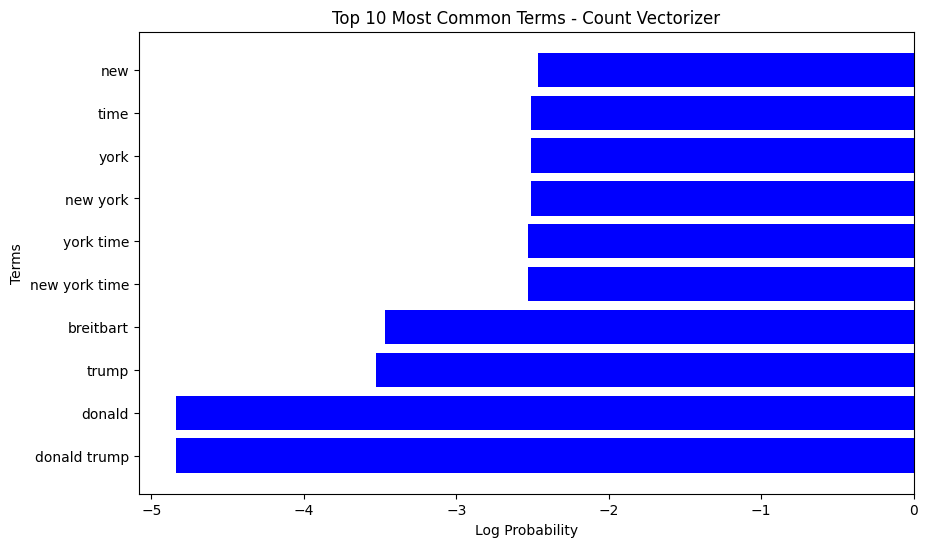

In [27]:
# Términos más frecuentes de Count Vectorizer
count_terms = sorted(zip(sub_classifier_count.feature_log_prob_[0], feature_names_count), reverse=True)[:10]
count_labels = [term[1] for term in count_terms]
count_frequencies = [term[0] for term in count_terms]

# Términos más frecuentes de Tfidf Vectorizer
tfidf_terms = sorted(zip(sub_classifier_tfidf.feature_log_prob_[0], feature_names_tfidf), reverse=True)[:10]
tfidf_labels = [term[1] for term in tfidf_terms]
tfidf_frequencies = [term[0] for term in tfidf_terms]

# Crear gráfico de barras para Count Vectorizer
plt.figure(figsize=(10, 6))
plt.barh(count_labels, count_frequencies, color='blue')
plt.xlabel('Log Probability')
plt.ylabel('Terms')
plt.title('Top 10 Most Common Terms - Count Vectorizer')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el término más común en la parte superior
plt.show()

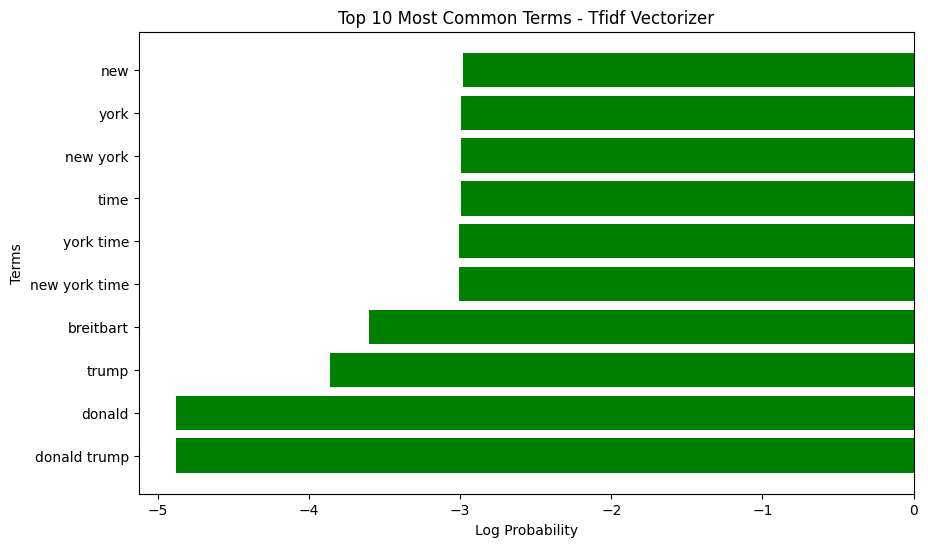

In [28]:
# Crear gráfico de barras para Tfidf Vectorizer
plt.figure(figsize=(10, 6))
plt.barh(tfidf_labels, tfidf_frequencies, color='green')
plt.xlabel('Log Probability')
plt.ylabel('Terms')
plt.title('Top 10 Most Common Terms - Tfidf Vectorizer')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el término más común en la parte superior
plt.show()

In this example, for this dataset, the words "trump," "hillary," "clinton," "election," and other terms related to political figures and events are prominent in both vectorizers, suggesting their importance in real news classification.

In [29]:
filename = 'passive_aggresive_model_count.sav'
pickle.dump(passive_classifier_count_model, open(filename, 'wb'))

filename = 'passive_aggresive_model_tfidf.sav'
pickle.dump(passive_classifier_tfidf_model, open(filename, 'wb'))

### Testing

In [30]:
test_data

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


To test the CountVectorizer and TFIDF classifiers with MultinominalNB, we must prepare the testing data. 

First of all, we will preprocess it.

In [31]:
corpus_test = preprocessing(test_data)

We calculate the sum of missing values for each column in the dataset in order to identify how many missing values are present in each column, providing insight into the completeness of the data and allowing for potential data handling strategies, such as imputation or removal of missing values.

In [32]:
test_data.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

The provided code segment prepares the text data in the 'corpus_test' by using two different vectorization techniques: CountVectorizer and TF-IDF Vectorizer. For CountVectorizer, the CountVectorizer class from the scikit-learn library is used, with the maximum number of features set to 'MAX_FEATURES_VECTORIZER' and an n-gram range of (1,3). The text data is then transformed into a numerical matrix using the fit_transform() function and stored in 'X_test_count'. Similarly, for TF-IDF Vectorizer, the TfidfVectorizer class is used with the same parameters, and the transformed matrix is stored in 'X_test_tfidf'. These matrix representations of the text data are used for testing the trained machine learning models.

In [33]:
# Prepare vectorizers (CountVectorizer)
count_vectorizer_handler_test = CountVectorizer(max_features=MAX_FEATURES_VECTORIZER,ngram_range=(1,3))
X_test_count = count_vectorizer_handler_test.fit_transform(corpus_test).toarray()

# Prepare vectorizers (TFIDFVectorizer)
tfidf_handler_test = TfidfVectorizer(max_features=MAX_FEATURES_VECTORIZER,ngram_range=(1,3))
X_test_tfidf = tfidf_handler_test.fit_transform(corpus_test).toarray()

In [34]:
Y_pred_count_passive = passive_classifier_count_model.predict(X_test_count)
Y_pred_tfidf_passive = passive_classifier_tfidf_model.predict(X_test_tfidf)

In [35]:
# Predictions Count Vectorizer and Passive Aggresive ALgorithm
submission= pd.DataFrame({"id":test_data.id, "title": test_data.title, "text": test_data.text, "label":Y_pred_count_passive})
submission.head()

,id,title,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,1
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [36]:
# Predictions TFIDF and Passive Aggresive ALgorithm
submission= pd.DataFrame({"id":test_data.id, "title": test_data.title, "text": test_data.text, "label":Y_pred_tfidf_passive})
submission.head()

,id,title,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,1
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


### Conclusions

The provided code demonstrates the use of two prominent text vectorization techniques, TF-IDF and CountVectorizer, along with the Passive Aggressive algorithm for fake news detection. TF-IDF and CountVectorizer are powerful methods for converting textual data into numerical representations, capturing the importance of words within the document. In the context of fake news detection, these techniques play a pivotal role in identifying key terms and features that can help distinguish between reliable and unreliable news articles.

The Passive Aggressive algorithm is employed due to its suitability for online learning, which is advantageous when dealing with a dynamic domain like fake news detection. It incrementally updates the model to adapt to changes in the data distribution while focusing on maintaining accuracy on previously seen examples. This adaptability is crucial for tracking evolving patterns of fake news.

In the context of a dataset focused on the 2017 political campaign for the presidency of Donald Trump and Hillary Clinton, the combination of TF-IDF, CountVectorizer, and the Passive Aggressive algorithm becomes particularly relevant. News articles related to political campaigns often involve complex language patterns and sentiment, which can be captured by these vectorization techniques. Identifying key terms and phrases specific to the campaign, candidates, or controversial topics is essential for detecting fake news.

Through the TF-IDF and CountVectorizer techniques, the model can automatically extract and assign weights to terms that are highly relevant to either reliable or unreliable news articles. By using the Passive Aggressive algorithm, the model continuously learns from incoming data, adjusting its parameters to minimize mistakes and adapt to emerging patterns. This approach enables the model to effectively differentiate between reliable and unreliable news articles, especially in the context of a dynamic political campaign.

Overall, the combination of TF-IDF, CountVectorizer, and the Passive Aggressive algorithm serves as a robust approach to fake news detection, particularly for datasets involving political campaigns. By leveraging the importance of specific terms, the model can provide insights into the linguistic characteristics associated with reliable and unreliable news, contributing to more accurate and timely identification of fake news articles.

TF-IDF and CountVectorizer are relatively simple and interpretable methods, making them easy to implement and understand. They work well when the focus is on feature extraction and capturing the importance of words in a document. These techniques are particularly useful when dealing with smaller datasets, where complex Deep Learning models might overfit.

On the other hand, Deep Learning models, such as Recurrent Neural Networks (RNNs) and Transformers, have the ability to capture intricate relationships in text data, including contextual nuances and long-range dependencies. They excel in handling vast amounts of text data and can automatically learn complex patterns and representations. However, Deep Learning models often require more computational resources and larger datasets to achieve optimal performance. They also tend to be less interpretable, making it challenging to understand why specific predictions are made.

In the realm of fake news detection, both approaches have their merits. TF-IDF and CountVectorizer are advantageous when computational resources are limited and when quick insights are required. They are useful for tasks where feature extraction and identifying key terms are the main goals. On the other hand, Deep Learning models shine when dealing with massive text datasets, capturing subtle linguistic nuances, and adapting to evolving patterns in news articles.

Furthermore, combining both approaches can lead to hybrid models that harness the strengths of both traditional NLP techniques and Deep Learning. For example, using TF-IDF or CountVectorizer as input features for a Deep Learning model can enhance the model's performance by providing it with rich contextual information.

In the context of fake news detection in the given dataset, using TF-IDF, CountVectorizer, and the Passive Aggressive algorithm provides a solid foundation. However, exploring Deep Learning models, such as LSTM or BERT, could also yield valuable insights, especially in scenarios where the data is vast, complex, and requires more nuanced understanding of text semantics.